## Import Models

In [2]:
#import required libraries — we do need the models, flatten, dense, input layers 
import sys
import cv2
import numpy as np 
import pandas as pd
from glob import glob 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


c:\Users\shady\anaconda3\envs\COMP9517\lib\site-packages\requests\__init__.py:114: RequestsDependencyWarning: urllib3 (1.26.14) or chardet (2.3.0)/charset_normalizer (None) doesn't match a supported version!
  RequestsDependencyWarning,


Num GPUs Available:  1


## 2. Import dataset

In [3]:
# Path for train, validation and test datasets
sys.path.append('../elpv-dataset/utils')
from elpv_reader import load_dataset
images, probs, types = load_dataset()

IMAGE_SIZE = [224, 224] #Default image size for VGG19
IMAGE_SIZE = [300,300] #Default image size for Resnet and co

import numpy as np
import pandas as pd

print(images.shape,probs.shape,types.shape)

# Define degradation categories based on labels
def categorize_labels(labels):
    categories = []
    for label in labels:
        if label == 0 :
            categories.append(0)
        elif label >= 0.32 and label <= 0.34:
            categories.append(1)
        elif label >= 0.65 and label <= 0.67:
            categories.append(2)
        else:
            categories.append(3)
    return categories

class_labels = categorize_labels(probs)
print(class_labels)
print(max(class_labels)+1)

(2624, 300, 300) (2624,) (2624,)
[3, 3, 3, 0, 3, 3, 3, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 2, 0, 0, 2, 0, 0, 3, 3, 3, 0, 0, 0, 0, 3, 0, 0, 0, 1, 0, 3, 0, 3, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0, 0, 3, 3, 1, 1, 1, 0, 0, 0, 0, 3, 0, 0, 1, 0, 3, 1, 1, 0, 3, 3, 0, 3, 0, 1, 0, 3, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 3, 1, 1, 1, 1, 3, 3, 2, 3, 2, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 1, 3, 1, 1, 3, 3, 3, 1, 1, 1, 2, 2, 2, 3, 3, 2, 3, 2, 2, 0, 1, 3, 3, 0, 3, 3, 3, 2, 1, 0, 0, 1, 0, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 0, 0, 3, 0, 3, 3, 3, 3, 1, 3, 0, 1, 3, 0, 0, 3, 3, 0, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 0, 3, 3, 3, 0, 2, 0, 0, 0, 0, 3, 0, 0, 0, 3, 3, 0, 3, 3, 3, 3, 

# Validation and Image Dataset
## Move Images to sorted folders for keras processing ##

In [7]:
import os
import shutil
from PIL import Image

# IMAGE_SIZE = [224, 224] #Default image size for VGG19
# destination_folder = '../elpv-dataset/sorted'
# IMAGE_SIZE = [300, 300] #Default image size
# destination_folder = '../elpv-dataset/sorted300'
IMAGE_SIZE = [299, 299] #Default image size
destination_folder = '../elpv-dataset/sorted299'

# Set the path to your source folder containing all images
source_folder = '../elpv-dataset/images'

# Set the path to your destination folder where you want to organize images by class


# Create destination folders if they don't exist
for class_index in range(4):  # Assuming you have 4 classes
    class_folder = os.path.join(destination_folder, str(class_index))
    os.makedirs(class_folder, exist_ok=True)

# List all image files in the source folder
image_files = [f for f in os.listdir(source_folder) if os.path.isfile(os.path.join(source_folder, f))]

# Read the class labels from your list

# Organize images by copying them to their respective class folders
for image_file, class_label in zip(image_files, class_labels):
    class_label = int(class_label)
    source_path = os.path.join(source_folder, image_file)
    destination_path = os.path.join(destination_folder, str(class_label), image_file)
 
 # Open the image using Pillow
    try:
        image = Image.open(source_path)
    except Exception as e:
        print(f"Error opening image {source_path}: {e}")
        continue

    # Resize the image (replace (width, height) with the desired size)
    resized_image = image.resize(IMAGE_SIZE)
    # Save the resized image to the destination path
    resized_image.save(destination_path)
    # Optionally, close the image
    image.close()

print("Images organized successfully!")



Images organized successfully!


## Add into training data set structure

In [9]:
#data_dir = '../elpv-dataset/sorted/'
data_dir = '../elpv-dataset/sorted300/'
data_dir = '../elpv-dataset/sorted299/'
img_height,img_width=IMAGE_SIZE
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
print(train_ds)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 2624 files belonging to 4 classes.
Using 2100 files for training.
<BatchDataset element_spec=(TensorSpec(shape=(None, 299, 299, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
Found 2624 files belonging to 4 classes.
Using 524 files for validation.


0.227451 1.0
Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_20 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 1

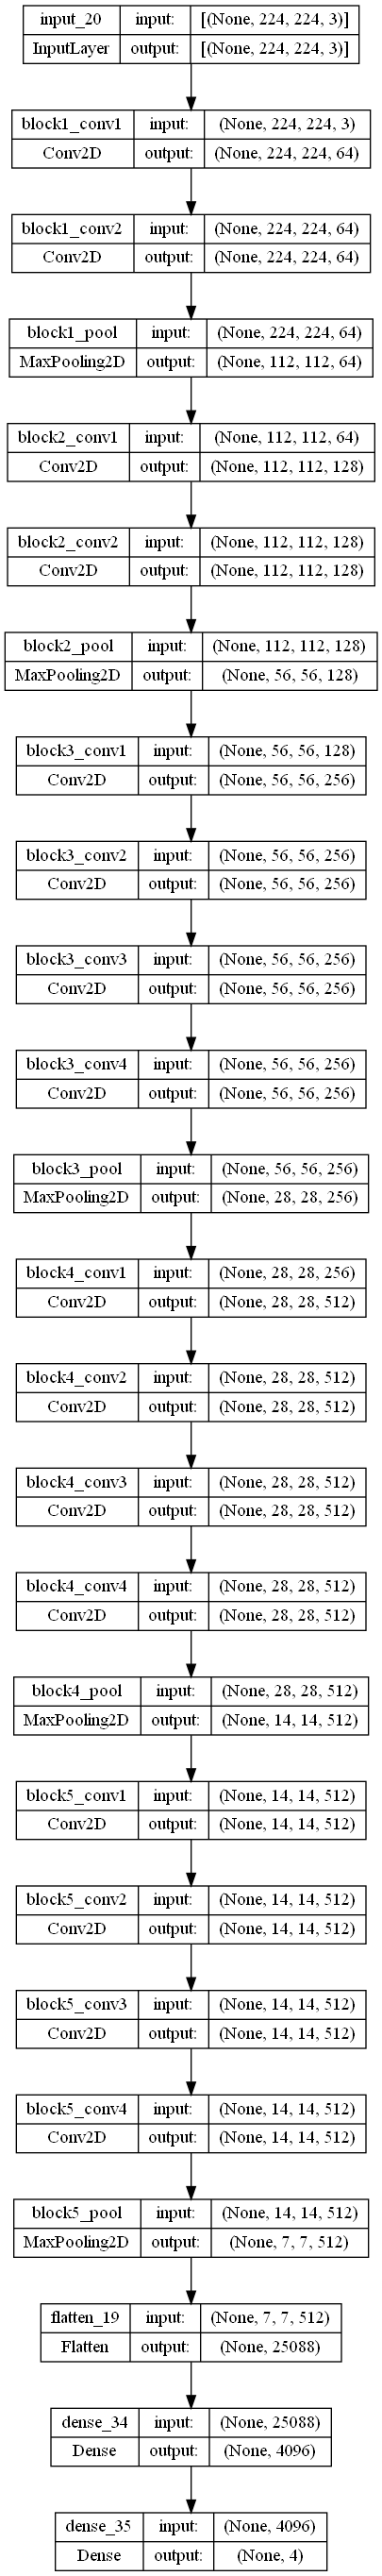

In [66]:
#normalize for training between 0-1
normalization_layer = tf.keras.layers.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))


# Use this line for VGG19 network. Create a VGG19 model, and removing the last layer that is classifying 1000 images. This will be replaced with images classes we have. 
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
# This sets the base that the layers are not trainable. If we'd want to train the layers with custom data, these two lines can be ommitted. 
for layer in vgg.layers:
  layer.trainable = False

x = Flatten()(vgg.output) #Output obtained on vgg19 is now flattened. 

x = Dense(4096, activation='relu')(x)
#x = Dense(2048, activation='reulu')(x)

prediction = Dense(4, activation='softmax')(x)

#Creating model object 
model = Model(inputs=vgg.input, outputs=prediction)

model.summary()


import pygraphviz
# Save the diagram to a file
plot_model(model, to_file='model_diagram.png', show_shapes=True, show_layer_names=True)


### Run the model

In [10]:
import time

#Compile the model 
start_time = time.time()
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
history = model.fit(train_ds, validation_data=val_ds, epochs=20, batch_size=32)
time_taken = time.time() - start_time
print(f"Function 1: Time taken - {time_taken:.4f} seconds\n\n")

model.save('models/VGG-19.h5')

Epoch 1/20


66/66 [==============================] - 17s 257ms/step - loss: 12.2667 - accuracy: 0.6333 - val_loss: 11.0446 - val_accuracy: 0.5763
Epoch 2/20
66/66 [==============================] - 16s 243ms/step - loss: 4.1613 - accuracy: 0.7700 - val_loss: 5.9495 - val_accuracy: 0.7099
Epoch 3/20
66/66 [==============================] - 16s 237ms/step - loss: 2.5941 - accuracy: 0.7952 - val_loss: 3.9315 - val_accuracy: 0.5935
Epoch 4/20
66/66 [==============================] - 16s 237ms/step - loss: 0.5906 - accuracy: 0.8952 - val_loss: 2.4089 - val_accuracy: 0.7347
Epoch 5/20
66/66 [==============================] - 16s 242ms/step - loss: 0.4270 - accuracy: 0.9124 - val_loss: 2.3318 - val_accuracy: 0.7271
Epoch 6/20
66/66 [==============================] - 48s 723ms/step - loss: 0.4222 - accuracy: 0.9190 - val_loss: 2.1772 - val_accuracy: 0.7252
Epoch 7/20
66/66 [==============================] - 49s 748ms/step - loss: 0.2919 - accuracy: 0.9276 - val_loss: 2.2726 - val_accuracy: 0.7500
Epoch 8/

In [4]:
model = tf.keras.models.load_model('models/VGG-19.h5')

In [5]:
# loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# accuracies
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

# from sklearn.metrics import classification_report

# y_pred = model.predict(x_test, batch_size=64, verbose=1)
# y_pred_bool = np.argmax(y_pred, axis=1)

# print(classification_report(y_test, y_pred_bool))


NameError: name 'history' is not defined

### Build Confusion matrix

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
y_pred = []  # store predicted labels
y_true = []  # store true labels

# iterate over the dataset
for image_batch, label_batch in val_ds:   # use dataset.unbatch() with repeat
   # append true labels
   y_true.append(label_batch)
   # compute predictions
   preds = model.predict(image_batch)
   # append predicted labels
   y_pred.append(np.argmax(preds, axis = - 1))

# convert the true and predicted labels into tensors
val_true_labels = tf.concat([item for item in y_true], axis = 0)
val_pred_labels = tf.concat([item for item in y_pred], axis = 0)

# Compute the confusion matrix
conf_matrix = confusion_matrix(val_true_labels, val_pred_labels)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


# Calculate additional evaluation metrics
accuracy = accuracy_score(val_true_labels, val_pred_labels)
precision = precision_score(val_true_labels, val_pred_labels, average='weighted', zero_division=1)
recall = recall_score(val_true_labels, val_pred_labels, average='weighted')
f1 = f1_score(val_true_labels, val_pred_labels, average='weighted')
f1_seperate = f1_score(val_true_labels, val_pred_labels, average=None)
# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("F1 Score sep:", f1_seperate)



1/1 [==============================] - 0s 21ms/step
Confusion Matrix:
[[314  37  12  16]
 [ 21  46   4   6]
 [ 11   5  10   0]
 [ 20  20   6 128]]
Accuracy: 0.7591463414634146
Precision: 0.7843815575621603
Recall: 0.7591463414634146
F1 Score: 0.7686251299475994
F1 Score sep: [0.84295302 0.4972973  0.34482759 0.79012346]


ResNet152V2

In [22]:
from tensorflow.keras.applications.resnet_v2 import ResNet152V2
# Use this line for VGG19 network. Create a VGG19 model, and removing the last layer that is classifying 1000 images. This will be replaced with images classes we have. 
resnet = ResNet152V2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
# This sets the base that the layers are not trainable. If we'd want to train the layers with custom data, these two lines can be ommitted. 
for layer in resnet.layers:
  layer.trainable = False

x2 = Flatten()(resnet.output) #Output obtained on resnet

#x2 = Dense(4096, activation='relu')(x)

prediction2 = Dense(4, activation='softmax')(x2)
#Creating model object 
model2 = Model(inputs=resnet.input, outputs=prediction2)
model2.summary()

#plot_model(model2, to_file='model_diagram.png', show_shapes=True, show_layer_names=True)


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [23]:
#Compile the model 
start_time = time.time()
model2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
history2 = model2.fit(train_ds, validation_data=val_ds, epochs=10, batch_size=32)
time_taken = time.time() - start_time
print(f"Function 1: Time taken - {time_taken:.4f} seconds\n\n")

model2.save('models/Resnet.h5')

Epoch 1/10


66/66 [==============================] - 113s 2s/step - loss: 25.2537 - accuracy: 0.4505 - val_loss: 19.0710 - val_accuracy: 0.5859
Epoch 2/10
66/66 [==============================] - 107s 2s/step - loss: 22.8710 - accuracy: 0.5019 - val_loss: 16.0812 - val_accuracy: 0.6489
Epoch 3/10
66/66 [==============================] - 107s 2s/step - loss: 22.0205 - accuracy: 0.5200 - val_loss: 15.2550 - val_accuracy: 0.6679
Epoch 4/10
66/66 [==============================] - 107s 2s/step - loss: 22.5369 - accuracy: 0.5095 - val_loss: 15.9951 - val_accuracy: 0.6527
Epoch 5/10
66/66 [==============================] - 107s 2s/step - loss: 21.1309 - accuracy: 0.5390 - val_loss: 14.3252 - val_accuracy: 0.6889
Epoch 6/10
66/66 [==============================] - 107s 2s/step - loss: 21.3203 - accuracy: 0.5352 - val_loss: 14.9404 - val_accuracy: 0.6756
Epoch 7/10
66/66 [==============================] - 100s 2s/step - loss: 20.4225 - accuracy: 0.5552 - val_loss: 17.2979 - val_accuracy: 0.6240
Epoch 8/10

In [23]:
model2 = tf.keras.models.load_model('models/Resnet.h5')

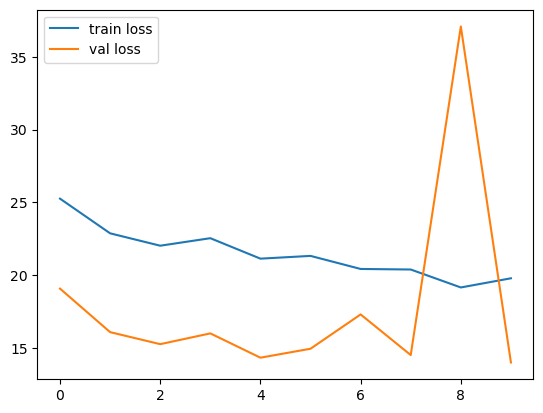

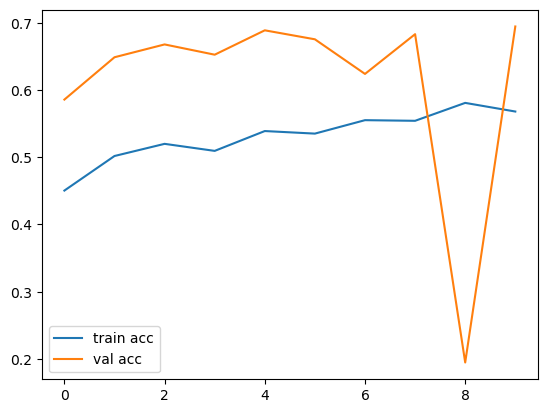

17/17 [==============================] - 9s 508ms/step
Confusion Matrix:
[[231   3   0  69]
 [ 54   0   0  12]
 [ 10   0   0   8]
 [110   0   0  27]]
Accuracy: 0.49236641221374045
Precision: 0.4250193764440935
Recall: 0.49236641221374045
F1 Score: 0.4331325299664474


In [25]:
# loss
plt.plot(history2.history['loss'], label='train loss')
plt.plot(history2.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# accuracies
plt.plot(history2.history['accuracy'], label='train acc')
plt.plot(history2.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()


In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
y_pred = []  # store predicted labels
y_true = []  # store true labels

# iterate over the dataset
for image_batch, label_batch in val_ds:   # use dataset.unbatch() with repeat
   # append true labels
   y_true.append(label_batch)
   # compute predictions
   preds = model2.predict(image_batch)
   # append predicted labels
   y_pred.append(np.argmax(preds, axis = - 1))

# convert the true and predicted labels into tensors
val_true_labels = tf.concat([item for item in y_true], axis = 0)
val_pred_labels = tf.concat([item for item in y_pred], axis = 0)

# Compute the confusion matrix
conf_matrix = confusion_matrix(val_true_labels, val_pred_labels)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


# Calculate additional evaluation metrics
accuracy = accuracy_score(val_true_labels, val_pred_labels)
precision = precision_score(val_true_labels, val_pred_labels, average='weighted', zero_division=1)
recall = recall_score(val_true_labels, val_pred_labels, average='weighted')
f1 = f1_score(val_true_labels, val_pred_labels, average='weighted')
f1_seperate = f1_score(val_true_labels, val_pred_labels, average=None)
# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("F1 Score sep:", f1_seperate)



1/1 [==============================] - 0s 51ms/step
Confusion Matrix:
[[288   0   0  15]
 [ 53   3   0  10]
 [ 17   0   0   1]
 [ 55   1   0  81]]
Accuracy: 0.7099236641221374
Precision: 0.7299680507291301
Recall: 0.7099236641221374
F1 Score: 0.6495617351044266
F1 Score sep: [0.80446927 0.08571429 0.         0.66393443]


### Inception (GoogLe Net) Method

In [29]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image

inception = InceptionV3(weights='imagenet')

x = Flatten()(inception.output) #Output obtained on vgg16 is now flattened. 
prediction3 = Dense(4, activation='softmax')(x)
#Creating model object 
model3 = Model(inputs=inception.input, outputs=prediction3)
model3.summary()
plot_model(model3, to_file='model_diagram.png', show_shapes=True, show_layer_names=True)

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 149, 149, 32  864         ['input_11[0][0]']               
                                )                                                                 
                                                                                                  
 batch_normalization_94 (BatchN  (None, 149, 149, 32  96         ['conv2d_94[0][0]']              
 ormalization)                  )                                                           

In [31]:
#Compile the model 
model3.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

def preprocess_image(image, label):
    # Resize the image to the expected input size of InceptionV3 (299x299 pixels)
    image = tf.image.resize(image, (299, 299))
    # Other preprocessing steps if needed
    return image, label

# Apply the preprocessing function to your datasets
train_ds = train_ds.map(preprocess_image)
val_ds = val_ds.map(preprocess_image)

history3 = model3.fit(train_ds, validation_data=val_ds, epochs=20, batch_size=32)
model3.save('models/inceptionv3.h5')



Epoch 1/20
66/66 [==============================] - 160s 2s/step - loss: 1.2973 - accuracy: 0.6381 - val_loss: 1.2766 - val_accuracy: 0.5782
Epoch 2/20
66/66 [==============================] - 112s 2s/step - loss: 1.2198 - accuracy: 0.6043 - val_loss: 1.2068 - val_accuracy: 0.5782
Epoch 3/20
66/66 [==============================] - 120s 2s/step - loss: 1.1633 - accuracy: 0.5971 - val_loss: 1.1615 - val_accuracy: 0.6469
Epoch 4/20
66/66 [==============================] - 155s 2s/step - loss: 1.1316 - accuracy: 0.5805 - val_loss: 1.1376 - val_accuracy: 0.5782
Epoch 5/20
66/66 [==============================] - 140s 2s/step - loss: 1.1070 - accuracy: 0.5729 - val_loss: 1.1171 - val_accuracy: 0.5782
Epoch 6/20
66/66 [==============================] - 137s 2s/step - loss: 1.0736 - accuracy: 0.5738 - val_loss: 1.1113 - val_accuracy: 0.5782
Epoch 7/20
66/66 [==============================] - 140s 2s/step - loss: 1.0533 - accuracy: 0.5738 - val_loss: 1.1056 - val_accuracy: 0.5782
Epoch 8/20
66

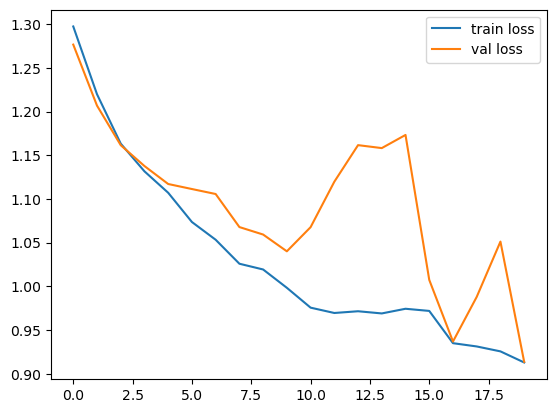

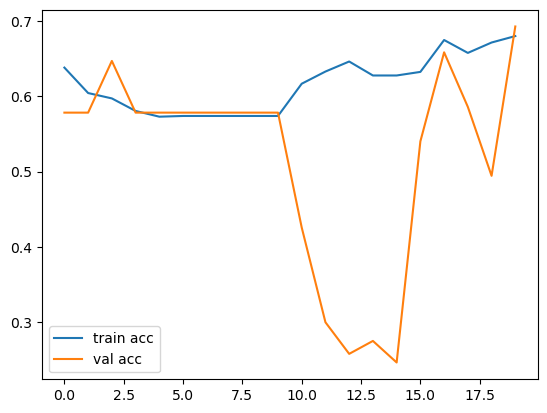

17/17 [==============================] - 5s 286ms/step
Confusion Matrix:
[[218   0   0  85]
 [ 49   0   0  17]
 [ 10   0   0   8]
 [102   0   0  35]]
Accuracy: 0.48282442748091603
Precision: 0.5560189426324522
Recall: 0.48282442748091603
F1 Score: 0.43456839134850533


In [32]:
# loss
plt.plot(history3.history['loss'], label='train loss')
plt.plot(history3.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# accuracies
plt.plot(history3.history['accuracy'], label='train acc')
plt.plot(history3.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()


In [5]:
model3 = tf.keras.models.load_model('models/inceptionv3.h5')

In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
y_pred = []  # store predicted labels
y_true = []  # store true labels

# iterate over the dataset
for image_batch, label_batch in val_ds:   # use dataset.unbatch() with repeat
   # append true labels
   y_true.append(label_batch)
   # compute predictions
   preds = model3.predict(image_batch)
   # append predicted labels
   y_pred.append(np.argmax(preds, axis = - 1))

# convert the true and predicted labels into tensors
val_true_labels = tf.concat([item for item in y_true], axis = 0)
val_pred_labels = tf.concat([item for item in y_pred], axis = 0)

# Compute the confusion matrix
conf_matrix = confusion_matrix(val_true_labels, val_pred_labels)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


# Calculate additional evaluation metrics
accuracy = accuracy_score(val_true_labels, val_pred_labels)
precision = precision_score(val_true_labels, val_pred_labels, average='weighted', zero_division=1)
recall = recall_score(val_true_labels, val_pred_labels, average='weighted')
f1 = f1_score(val_true_labels, val_pred_labels, average='weighted')
f1_seperate = f1_score(val_true_labels, val_pred_labels, average=None)
# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("F1 Score sep:", f1_seperate)


1/1 [==============================] - 1s 665ms/step
Confusion Matrix:
[[284   0   0  19]
 [ 56   0   0  10]
 [ 18   0   0   0]
 [ 72   0   0  65]]
Accuracy: 0.666030534351145
Precision: 0.7230056732552474
Recall: 0.666030534351145
F1 Score: 0.5952167258989582
F1 Score sep: [0.77489768 0.         0.         0.56277056]
